# Project Name: House Price Prediction
Here we are given with data on several houses with specifications and their price. We have to build a system to Predict the house price based on the features available. 

### Calling the common libraries

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

### Loading the data set

In [2]:
from  sklearn.datasets import load_boston

# let's call the dataset that is availbale in sklearn.datasets
data_csv = load_boston()
data_csv

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
# now the data is given in the csv format and it is of no use until we convert it to a dataframe Object. Let's convert it to a 
# dataframe

df = pd.DataFrame(data_csv['data'], columns=data_csv['feature_names']) # calling the independent variables
df['PRICE'] = data_csv['target'] # append the target column to the main dataset

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# let's see  the dimensions of the dataset
print(f''' 
No of rows: {df.shape[0]}
No of columns: {df.shape[1]}
''')

 
No of rows: 506
No of columns: 14



In [7]:
# check for the missing values
df.isnull().sum()

# none of the columns has any missing values in the datasets

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [8]:
# let's see the important statistical features in the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


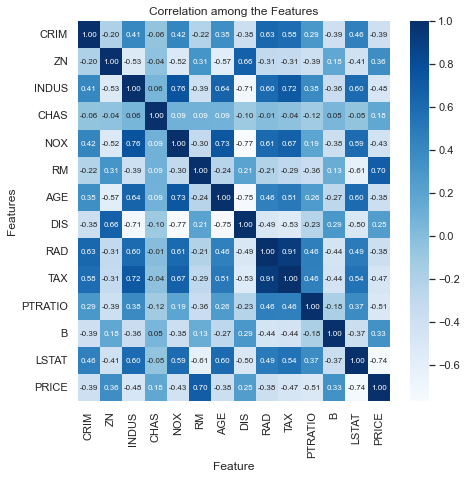

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# let's checkout the correlation values among the features
corrltn = df.corr()

sns.set(rc = {'figure.figsize': (7,7)})
sns.heatmap(corrltn , cbar=True, cmap='Blues', annot=True, annot_kws={'size': 8}, fmt='.2f')
plt.title('Correlation among the Features')
plt.xlabel('Feature')
plt.ylabel('Features')
plt.show()

# comment: The features TAX and RAD has a very high correlation among themselves

### Formation of X and y 

In [16]:
# lets build the X and y from the data to use into The model
X = df.drop('PRICE',axis=1)
y = df['PRICE']

In [17]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

### Training and Testing Data

In [19]:
from sklearn.model_selection import train_test_split

# let's split the dataset inot training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [20]:
# dimensions of the training and testing dataset
print(
f'''
X_train: {X_train.shape}
X_test: {X_test.shape}
y_train: {y_train.shape}
y_test: {y_test.shape} 
''')


X_train: (404, 13)
X_test: (102, 13)
y_train: (404,)
y_test: (102,) 



### Building the model

In [21]:
from xgboost import XGBRegressor

# building model
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Model Evaluation

In [23]:
from  sklearn.metrics import r2_score

# model score for the training data
X_train_pred = model.predict(X_train)
training_score = round(r2_score(X_train_pred, y_train)*100, 4)

# model score for the testing data
X_test_pred = model.predict(X_test)
testing_score = round(r2_score(X_test_pred, y_test)*100, 4)

print(f'''
Training_score: {training_score} %
Testing_score: {testing_score} %
''')


Training_score: 99.9995 %
Testing_score: 86.0667 %



### Visualizing the Efficiency of Prediction

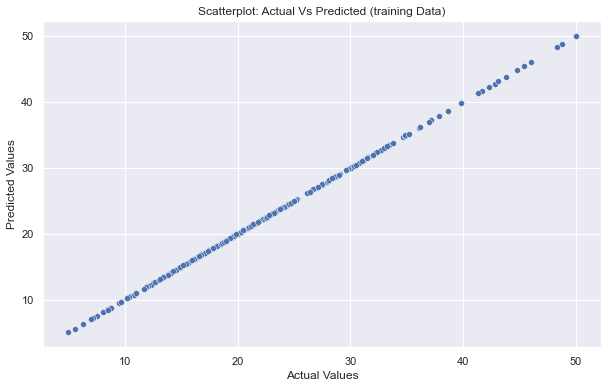

In [26]:
# lets visualize how well the model works for training data
sns.set(rc={'figure.figsize': (10,6)})
sns.scatterplot(y_train,X_train_pred)
plt.title('Scatterplot: Actual Vs Predicted (training Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

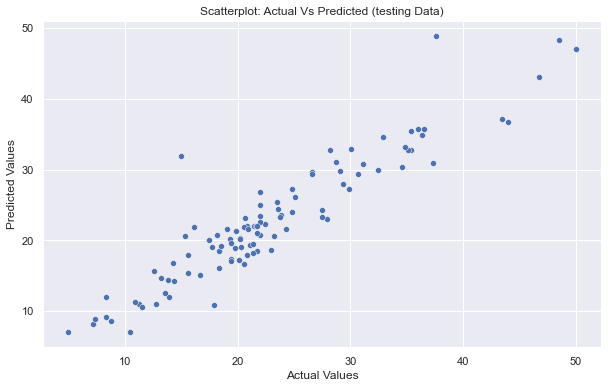

In [27]:
# lets visualize how well the model works for testing data
sns.set(rc={'figure.figsize': (10,6)})
sns.scatterplot(y_test,X_test_pred)
plt.title('Scatterplot: Actual Vs Predicted (testing Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()